In [61]:
# Exemplo 
import numpy as np
from scipy import optimize # pacote para ajuste MMQ
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
tvec = np.array([3.44 ,2.75, 2.34, 2.13, 1.81 ]) # segundos
h0 = 80 #cm#
m_sum = np.array([1.785, 1.803, 1.823, 1.842, 1.867]) #kg
m_delta = np.array([ 0.047, 0.065, 0.085, 0.104, 0.129]) #kg

In [15]:
def cm2inch(x,y):
    return (x/2.54,y/2.54)

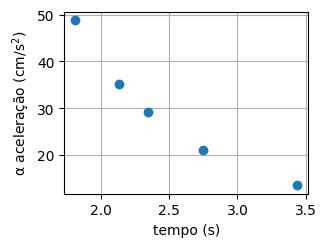

In [22]:
avec = 2*h0/tvec**2
#criar um  grafico
fig, ax = plt.subplots(1,1,figsize=cm2inch(8,6))
plt.plot(tvec, avec,'o')
plt.xlabel('tempo (s)')
plt.ylabel('α aceleração (cm/s$^2$)')
plt.grid(True)
plt.savefig('grafica_aceleracao_media.png',bbox_inches = 'tight')

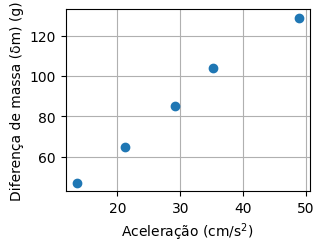

In [24]:
fig, ax = plt.subplots(1,1,figsize=cm2inch(8,6))
plt.plot(avec, m_delta*1e3,'o')
plt.ylabel('Diferença de massa (δm) (g)')
plt.xlabel('Aceleração (cm/s$^2$)')
plt.grid(True)
plt.savefig('grafica_aceleracao_media.pdf')

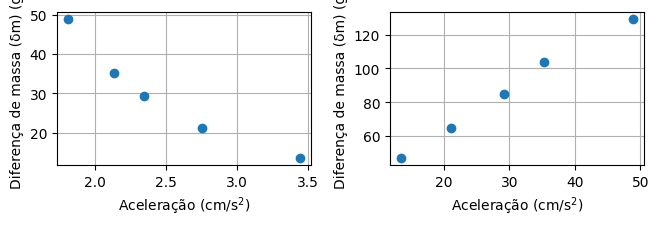

In [28]:
fig, ax = plt.subplots(1,2,figsize=cm2inch(17,6))
ax0 =  ax[0]
ax0.plot(tvec,avec,'o')
ax0.set_ylabel('Diferença de massa (δm) (g)')
ax0.set_xlabel('Aceleração (cm/s$^2$)')
ax0.grid(True)
#--
ax0 =  ax[1]
ax0.plot(avec, m_delta*1e3,'o')
ax0.set_ylabel('Diferença de massa (δm) (g)')
ax0.set_xlabel('Aceleração (cm/s$^2$)')
ax0.grid(True)
#----
plt.tight_layout()
plt.savefig('grafica_aceleracao_media.pdf')

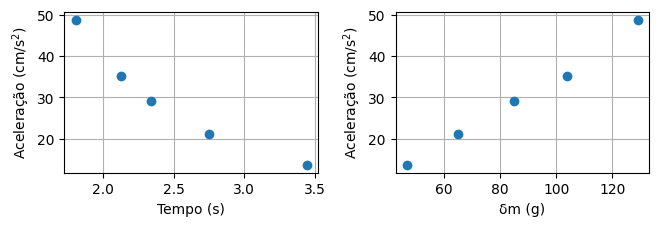

In [36]:
fig, ax = plt.subplots(1,2,figsize=cm2inch(17,6))
ax0 =  ax[0]
ax0.plot(tvec,avec,'o')
ax0.set_ylabel('Aceleração (cm/s$^2$)')
ax0.set_xlabel('Tempo (s)')
ax0.grid(True)
#--
ax0 =  ax[1]
ax0.plot(m_delta*1e3,avec, 'o')
ax0.set_ylabel('Aceleração (cm/s$^2$)')
ax0.set_xlabel('δm (g)')
ax0.grid(True)
#----
plt.tight_layout()
plt.savefig('grafica_aceleracao_media.png')

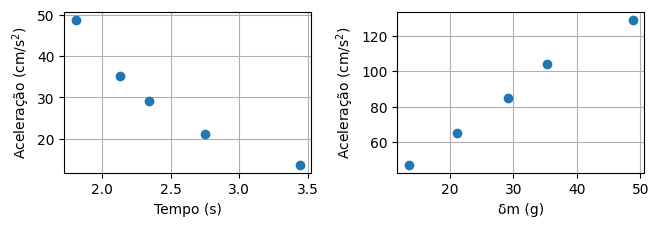

In [34]:
fig, ax = plt.subplots(1,2,figsize=cm2inch(17,6))
ax0 =  ax[0]
ax0.plot(tvec,avec,'o')
ax0.set_ylabel('Aceleração (cm/s$^2$)')
ax0.set_xlabel('Tempo (s)')
ax0.grid(True)
#--
ax0 =  ax[1]
ax0.plot(avec,m_delta*1e3, 'o')
ax0.set_ylabel('Aceleração (cm/s$^2$)')
ax0.set_xlabel('δm (g)')
ax0.grid(True)
#----
plt.tight_layout()
plt.savefig('grafica_aceleracao_media.png')

In [37]:
def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = avec, ydata = m_delta*1e3)[0] # função do scipy
print(alpha)

[ 2.36824379 15.89841223]


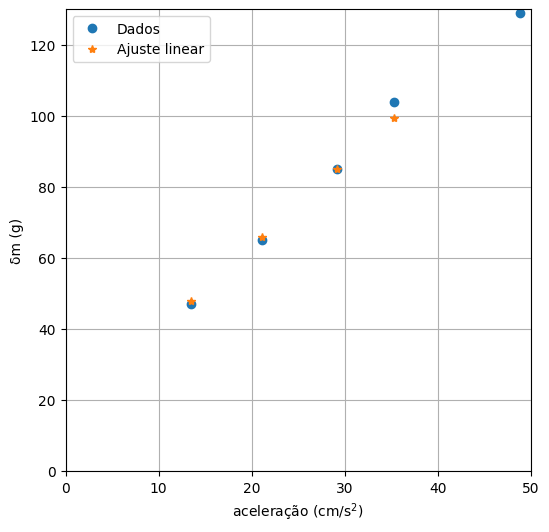

In [42]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.plot(avec, m_delta*1e3,'o') # grafico expei
#plt.plot(avec, func(avec_modelo,alpha[0],alpha[1]),'-',color='black') # graf modelo
plt.plot(avec, func(avec,alpha[0],alpha[1]),'*')
plt.ylabel('δm (g)')
plt.xlabel('aceleração (cm/s$^2$)')
plt.grid(True)
plt.legend(['Dados','Ajuste linear'])
plt.xlim([0,50])
plt.ylim([0,130])
plt.savefig('grafica_aceleracao_media.pdf')


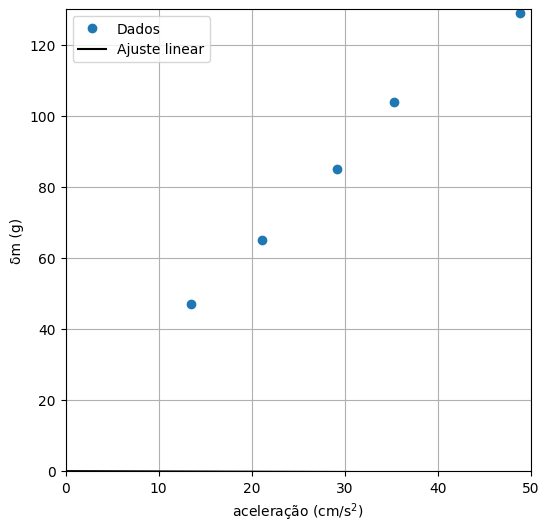

In [112]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
avec_modelo = np.linspace(0,50,5000)
plt.plot(avec, m_delta*1e3,'o') # grafico expei
plt.plot(avec_modelo, func(avec_modelo,alpha[0],alpha[1]),'-',color='black') # graf modelo
plt.ylabel('δm (g)')
plt.xlabel('aceleração (cm/s$^2$)')
plt.grid(True)
plt.legend(['Dados','Ajuste linear'])
plt.xlim([0,50])
plt.ylim([0,130])
plt.savefig('grafica_aceleracao_media.pdf')


Relatório sobre experimento 1
* $\alpha$

In [115]:
#Exemplo para calcular DV dos parâmetros
alpha,cov = optimize.curve_fit(func, xdata = avec, ydata = m_delta*1e3) # função do scipy
print(alpha)

[ 2.36824379 15.89841223]


In [60]:
δalpha = np.diag(cov) # extrai diagonal
print(\delta)

[1.33897618e-02 1.36928899e+01]


In [90]:
#carregando arquivo
data=pd.read_csv('tabelas.txt',sep=';')
data = data[data['y'].notna()]

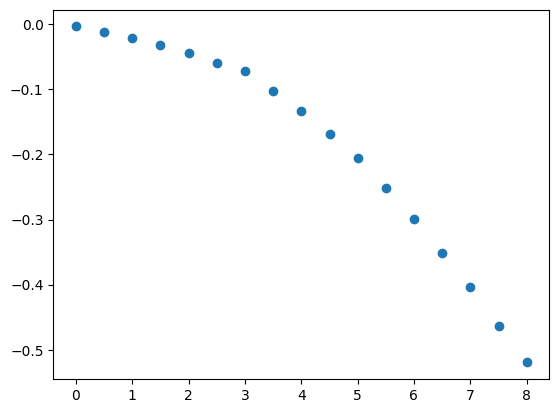

In [92]:
plt.plot(data['t'],data['y'],'o')

In [109]:
def func2(x, a, b, c):
    y = a*x**2 + b*x + c
    return y
def dfunc2(x, a, b, c):
    y = 2*a*x + b
    return y  
def d2func2(x, a, b, c):
    y = 2*a+0*x
    return y  

[-0.0082206   0.00150002 -0.0100262 ]
[0.0001931  0.00160174 0.00276366]


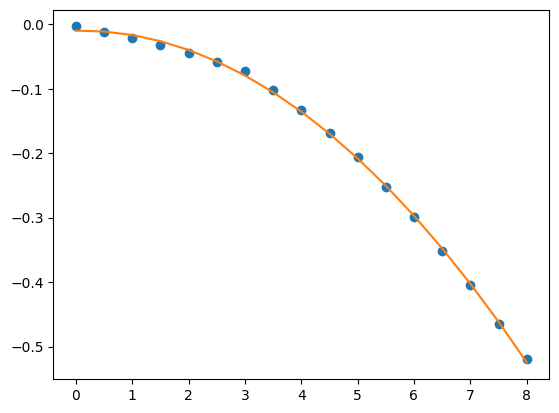

In [111]:
xdata = data['t']
ydata = data['y']
#Exemplo para calcular DV dos parâmetros
alpha,cov = optimize.curve_fit(func2, xdata = xdata, ydata = ydata) # função do scipy
print(alpha)
δalpha = np.sqrt(np.diag(cov)) # extrai diagonal
print(δalpha)
#----
plt.plot(data['t'],data['y'],'o')
plt.plot(data['t'],func2(xdata,alpha[0],alpha[1],alpha[2]),'-')

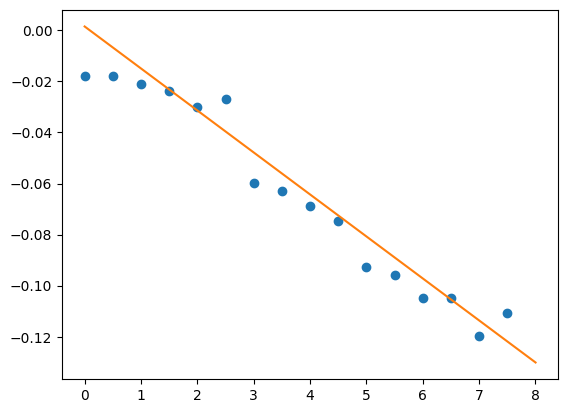

In [104]:
plt.plot(data['t'][:-1],np.diff(data['y'])/np.diff(data['t']),'o')
plt.plot(data['t'],dfunc2(xdata,alpha[0],alpha[1],alpha[2]),'-')

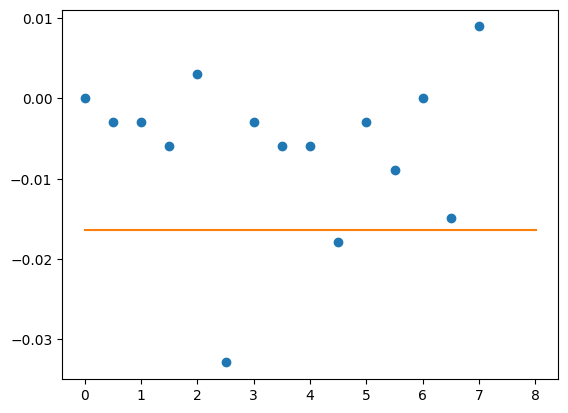

In [110]:
plt.plot(data['t'][:-2],np.diff(data['y'],2)/np.diff(data['t'])[:-1],'o')
plt.plot(data['t'],d2func2(xdata,alpha[0],alpha[1],alpha[2]),'-')

In [ ]:
fig, ax = plt.subplots(1,2,figsize=cm2inch(17,6))
ax0 =  ax[0]
plt.plot(data['t'],data['y'],'o')
plt.plot(data['t'],func2(xdata,alpha[0],alpha[1],alpha[2]),'-')